# Critical Care Analytics: Insight from the Emergency Room

### Connect to MySQL Database

In [9]:
import mysql.connector
import pandas as pd

# MySQL Connection
conn = mysql.connector.connect(
    host="127.0.0.1",
    user="root",
    password="123456",
    database="critical_care_db"
)
# Check connection
if conn.is_connected():
    print("✅ Connected to MySQL!")


✅ Connected to MySQL!


In [11]:
cursor = conn.cursor()

### Explanation:

This code connects your Python script to the MySQL database named critical_care_db using the mysql.connector library.

It sets up a connection with the provided host, username, and password details.

A cursor object is created to execute SQL queries and interact with the database.



### Load Multiple MySQL Tables into Pandas DataFrames

In [15]:
# 4. List of Tables to Load
# -------------------------------------------
table_names = ['departments', 'diagnosis', 'doctors', 'hospitals', 'outcomes', 'patients', 'visits']

# -------------------------------------------
# 5. Load Each Table into a Pandas DataFrame
# -------------------------------------------
dataframes = {}
for table in table_names:
    query = f"SELECT * FROM {table}"
    df = pd.read_sql(query, conn)
    dataframes[table] = df

# -------------------------------------------
# 6. Assign Individual DataFrames for Convenience
# -------------------------------------------
patients_df = dataframes['patients']
visits_df = dataframes['visits']
doctors_df = dataframes['doctors']
hospitals_df = dataframes['hospitals']
outcomes_df = dataframes['outcomes']
departments_df = dataframes['departments']
diagnosis_df = dataframes['diagnosis']

C:\Users\Admin\AppData\Local\Temp\ipykernel_13304\2399923230.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


### Explanation:

Retrieves data from multiple MySQL tables using a loop and loads each table into a pandas DataFrame.

Stores all DataFrames in a dictionary and then assigns them to individual variables for easy access during analysis.



### Preview Table Shapes and Sample Records

In [19]:
for name, df in dataframes.items():
    print(f"{name} shape: {df.shape}")
    print(df.head(2))


departments shape: (4, 2)
        department_name  department_code
0         Critical Care                1
1  Emergency Department                2
diagnosis shape: (662, 2)
       diagnosis  diagnosis_code
0          COUGH               1
1  ESSENTIAL HTN               2
doctors shape: (15, 3)
   doctor_code          doctor_name   doctor_speciality
0            1  Dr. Thomas Anderson       Critical Care
1            2    Dr. Lisa Anderson  Emergency Medicine
hospitals shape: (2, 2)
   hospital_code                hospital_name
0            100  Metropolitan Medical Center
1            200             Central Hospital
outcomes shape: (22, 2)
             outcome  outcome_code
0  DISCHARGE FROM ER             1
1    CONDITION CURED             2
patients shape: (41757, 22)
   patient_id  gender nationality  national_id location_code date_of_birth  \
0       58107    Male         USA     22300000        AREA 7    24-04-1935   
1       47124  Female         USA     22300001        AREA 1

### Explanation:

Iterates through each table loaded into the dataframes dictionary and prints its name along with the number of rows and columns using df.shape.

Displays the first two rows of each DataFrame using df.head(2) to quickly preview the data.

## Data Cleaning And Data Preprocessing

### Merge All Tables into a Single Comprehensive DataFrame

In [16]:
merged_df = visits_df \
    .merge(patients_df, on='patient_id', how='left') \
    .merge(diagnosis_df, on='diagnosis_code', how='left') \
    .merge(doctors_df, on='doctor_code', how='left') \
    .merge(departments_df, on='department_code', how='left') \
    .merge(hospitals_df, on='hospital_code', how='left') \
    .merge(outcomes_df, on='outcome_code', how='left')


### Explanation:

Combines the visits_df with other related tables (patients, diagnosis, doctors, departments, hospitals, and outcomes) using left joins based on their respective key columns.

The result is a unified merged_df that consolidates patient visits with all relevant information for end-to-end analysis.

### Inspect Merged DataFrame Dimensions and Sample Records

In [19]:
print(merged_df.shape)
merged_df.head()


(87452, 87)


,id,patient_id,mr_no,gender_x,episode_no,date_arrived,time_arrived,date_tiraged,time_tiraged,date_treatment_start,...,Target Status,Patient Satisfaction Score,Patient Waittime,Patients CM,diagnosis,doctor_name,doctor_speciality,department_name,hospital_name,outcome
0,65754,59968,A00-00-26518,Male,33,08-05-2023,07:51:00,08-05-2023,20:46:12,08-05-2023,...,NaN,NaN,NaN,NaN,COUGH,Dr. Thomas Anderson,Critical Care,Critical Care,Metropolitan Medical Center,DISCHARGE FROM ER
1,65763,59981,A00-00-26531,Female,21,05-11-2022,08:46:00,05-11-2022,11:44:00,05-11-2022,...,Within Target,5.0,45.0,0.0,ESSENTIAL HTN,Dr. Thomas Anderson,Critical Care,Emergency Department,Central Hospital,CONDITION CURED
2,65765,60053,A00-00-26603,Male,29,15-04-2021,10:58:00,15-04-2021,15:30:59,15-04-2021,...,Target Missed,5.0,22.0,0.0,ESSENTIAL HTN,Dr. Lisa Anderson,Emergency Medicine,Trauma Center,Central Hospital,CONDITION CURED
3,65774,60061,A00-00-26611,Male,6,14-04-2020,11:17:00,14-04-2020,03:34:09,14-04-2020,...,Within Target,0.0,35.0,0.0,ESSENTIAL HTN,Dr. William Harris,Emergency Medicine,Acute Care,Metropolitan Medical Center,CONDITION CURED
4,65774,60061,A00-00-26611,Male,6,14-04-2020,11:17:00,14-04-2020,03:34:09,14-04-2020,...,Within Target,4.0,41.0,0.0,ESSENTIAL HTN,Dr. William Harris,Emergency Medicine,Acute Care,Metropolitan Medical Center,CONDITION CURED


### Explanation:

print(merged_df.shape) displays the number of rows and columns in the final merged DataFrame to confirm successful merging.

merged_df.head() shows the first 5 rows of the merged dataset to preview the combined information across all tables.

### Display Basic Information and Summary Statistics of Merged DataFrame

In [22]:
# Basic Info
print("Shape of dataset:", merged_df.shape)
print("\nData types and nulls:")
print(merged_df.info())

# Quick Summary
print("\nSummary statistics:")
print(merged_df.describe(include='all'))


Shape of dataset: (87452, 87)

Data types and nulls:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87452 entries, 0 to 87451
Data columns (total 87 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 87452 non-null  int64  
 1   patient_id                         87452 non-null  int64  
 2   mr_no                              87452 non-null  object 
 3   gender_x                           87452 non-null  object 
 4   episode_no                         87452 non-null  int64  
 5   date_arrived                       87452 non-null  object 
 6   time_arrived                       87452 non-null  object 
 7   date_tiraged                       87452 non-null  object 
 8   time_tiraged                       87452 non-null  object 
 9   date_treatment_start               87452 non-null  object 
 10  time_treatment_start               87452 non-null  object 
 11  d

### Explanation:

Prints the shape, data types, and missing value counts using merged_df.shape and merged_df.info() to understand the structure and completeness of the dataset.

Generates summary statistics for all columns using merged_df.describe(include='all') to get an overview of numeric and categorical data distributions.

### Identify Missing Values in Merged DataFrame

In [25]:
# Check for missing values
missing = merged_df.isnull().sum().sort_values(ascending=False)
print("\nMissing values per column:\n", missing)



Missing values per column:
 mobile_no_y      46352
Patient Race     46352
gender_y         46352
nationality_y    46352
national_id_y    46352
                 ...  
ward                 0
bed_no               0
admit_time           0
admit_date           0
outcome              0
Length: 87, dtype: int64


### Explanation:

Calculates the total number of missing (null) values in each column using isnull().sum().

Sorts and displays the columns in descending order of missing values to prioritize data cleaning efforts.

### Analyze Key Distributions in the Emergency Visit Data

In [30]:
# Frequency of Priority Levels
print("\nTriage Priority Distribution:")
print(merged_df['priority'].value_counts())

# Outcome distribution
print("\nOutcome Distribution:")
print(merged_df['outcome_code'].value_counts())

# Most common diagnosis codes
print("\nTop Diagnoses:")
print(merged_df['diagnosis_code'].value_counts().head(10))

# Age breakdown
print("\nAge Distribution (Text):")
print(merged_df['age_text_y'].value_counts().head())



Triage Priority Distribution:
priority
CTAS-2    17769
CTAS-1    17573
CTAS-4    17455
CTAS-5    17404
CTAS-3    17251
Name: count, dtype: int64

Outcome Distribution:
outcome_code
1     44545
2     36526
4      2992
7      1755
3       978
6       251
9       150
12       68
5        43
10       31
11       30
13       16
15       13
18       11
8        10
14        8
17        7
16        6
19        6
20        2
21        2
22        2
Name: count, dtype: int64

Top Diagnoses:
diagnosis_code
2     33027
4      9857
14     5247
1      4738
20     4521
13     4464
29     3148
25     1978
95     1309
8      1220
Name: count, dtype: int64

Age Distribution (Text):
age_text_y
0.93     26
49.70    24
47.70    24
45.66    22
57.23    22
Name: count, dtype: int64


### Explanation:

Displays frequency counts for important categorical features—triage priority, outcomes, diagnosis codes, and age groups to understand common patterns and case types.

Helps identify the most frequent clinical and demographic categories, supporting focused analysis and visualization in later steps.

### Display All Column Names in the Merged DataFrame

In [33]:
print(merged_df.columns.tolist())


['id', 'patient_id', 'mr_no', 'gender_x', 'episode_no', 'date_arrived', 'time_arrived', 'date_tiraged', 'time_tiraged', 'date_treatment_start', 'time_treatment_start', 'date_complete', 'time_complete', 'time_treatment', 'nationality_x', 'national_id_x', 'location_code_x', 'date_of_birth_x', 'age_text_x', 'mobile_no_x', 'patient_category_x', 'priority', 'outcome_code', 'arrival_method', 'admit_date', 'admit_time', 'bed_no', 'ward', 'accepting_admission_request_time', 'pharmacy_order_date', 'pharmacy_order_time', 'pharmacy_delivery_date', 'pharmacy_delivery_time', 'clinic_name', 'diagnosis_code', 'waiting_time_minutes', 'total_er_duration_minutes', 'triage_response_time_minutes', 'treatment_duration_minutes', 'admission_processing_time_minutes', 'bed_assignment_time_minutes', 'pharmacy_response_time_minutes', 'is_admitted', 'is_weekend', 'is_night_visit', 'triage_compliance_flag', 'service_target_met', 'arrival_shift', 'age_group', 'length_of_stay_category', 'wait_time_category', 'visit_

### Explanation:

Uses .columns.tolist() to convert the column index of merged_df into a standard Python list.

Helps quickly view all column names to reference them for analysis, visualization, or feature selection.

## Exploratory Data Analysis (EDA)

### Visualize Triage Priority Distribution Using a Count Plot

C:\Users\Admin\AppData\Local\Temp\ipykernel_8316\1858333750.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_df, x='priority', palette='viridis')


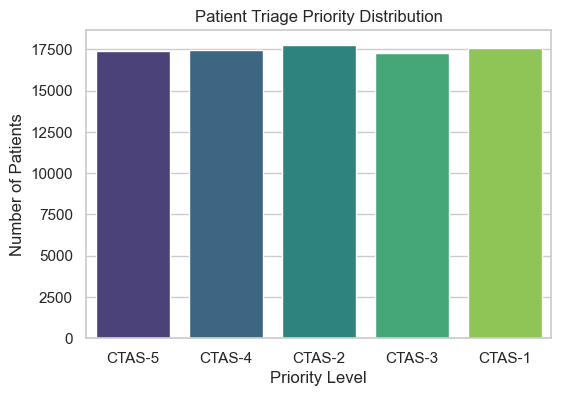

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Set a consistent theme
sns.set(style="whitegrid")

plt.figure(figsize=(6, 4))
sns.countplot(data=merged_df, x='priority', palette='viridis')
plt.title('Patient Triage Priority Distribution')
plt.xlabel('Priority Level')
plt.ylabel('Number of Patients')
plt.show()


### Explanation:

Uses Seaborn and Matplotlib to create a count plot showing the number of patients for each triage priority level.

Enhances understanding of patient severity distribution in the emergency room by providing a clear, visual summary.



### Patient Outcomes by Department

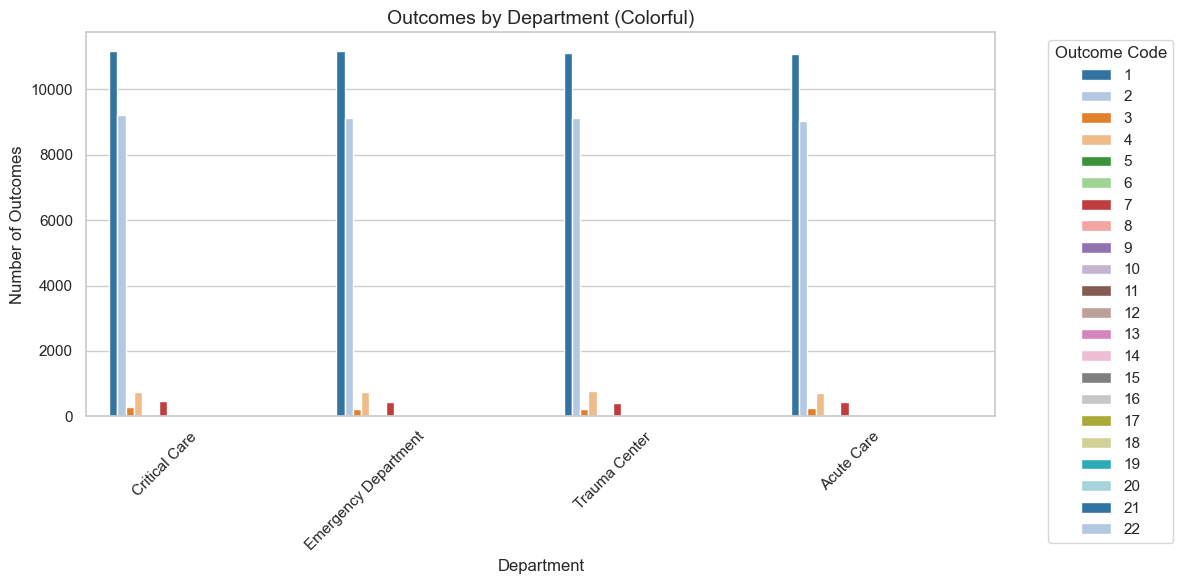

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(data=merged_df, x='department_name', hue='outcome_code', palette='tab20')
plt.title('Outcomes by Department (Colorful)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Department')
plt.ylabel('Number of Outcomes')
plt.legend(title='Outcome Code', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Explanation:

Creates a grouped count plot showing how patient outcomes (outcome_code) are distributed across different hospital departments (department_name_y).

Helps identify patterns or disparities in outcomes across departments using color-coded bars and rotated labels for clarity.



### Top 10 Most Common Diagnoses

C:\Users\Admin\AppData\Local\Temp\ipykernel_8316\288962538.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_diagnoses.values, y=top_diagnoses.index, palette='coolwarm')


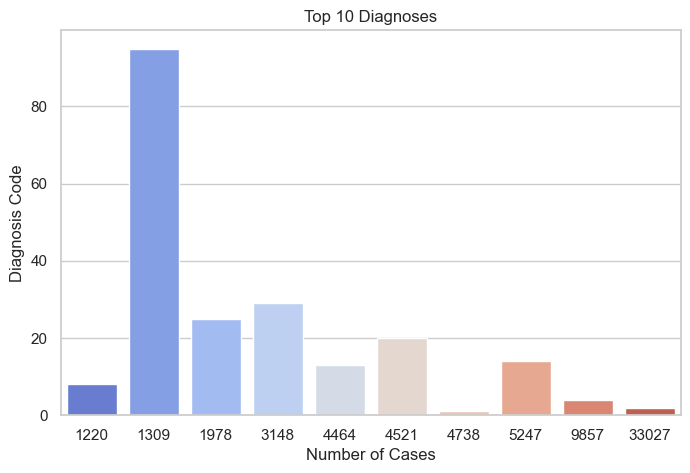

In [47]:
top_diagnoses = merged_df['diagnosis_code'].value_counts().head(10)
plt.figure(figsize=(8, 5))
sns.barplot(x=top_diagnoses.values, y=top_diagnoses.index, palette='coolwarm')
plt.title('Top 10 Diagnoses')
plt.xlabel('Number of Cases')
plt.ylabel('Diagnosis Code')
plt.show()


### Explanation:

Identifies the 10 most frequent diagnosis codes from the merged dataset using value_counts().head(10).

Displays these diagnoses in a horizontal bar chart to highlight the most common medical conditions seen in the emergency room.



### Clean and Compute Patient Wait Time Before Treatment

In [53]:
# First, ensure the columns are treated as strings
cols_to_clean = ['date_arrived', 'time_arrived', 'date_treatment_start', 'time_treatment_start']
for col in cols_to_clean:
    merged_df[col] = merged_df[col].astype(str)

# Now filter out rows where any datetime component is null or empty
merged_df_clean = merged_df[
    merged_df['date_arrived'].str.strip().ne('') &
    merged_df['time_arrived'].str.strip().ne('') &
    merged_df['date_treatment_start'].str.strip().ne('') &
    merged_df['time_treatment_start'].str.strip().ne('')
]

# Safely convert to datetime (let pandas handle inconsistent formats)
merged_df_clean['time_arrived'] = pd.to_datetime(
    merged_df_clean['date_arrived'] + ' ' + merged_df_clean['time_arrived'],
    errors='coerce'
)
merged_df_clean['time_treatment_start'] = pd.to_datetime(
    merged_df_clean['date_treatment_start'] + ' ' + merged_df_clean['time_treatment_start'],
    errors='coerce'
)

# Drop rows where datetime conversion failed
merged_df_clean = merged_df_clean.dropna(subset=['time_arrived', 'time_treatment_start'])

# Compute wait time
merged_df_clean['wait_time'] = (
    merged_df_clean['time_treatment_start'] - merged_df_clean['time_arrived']
).dt.total_seconds() / 60


### Explanation:

Cleans and validates datetime fields by ensuring no missing or malformed values, then converts them to proper datetime format using pd.to_datetime().

Calculates wait_time in minutes by finding the difference between treatment start time and arrival time, enabling analysis of ER response efficiency.

### Average Treatment Duration by Department

C:\Users\Admin\AppData\Local\Temp\ipykernel_8316\2247574704.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_time.values, y=avg_time.index, palette='flare')


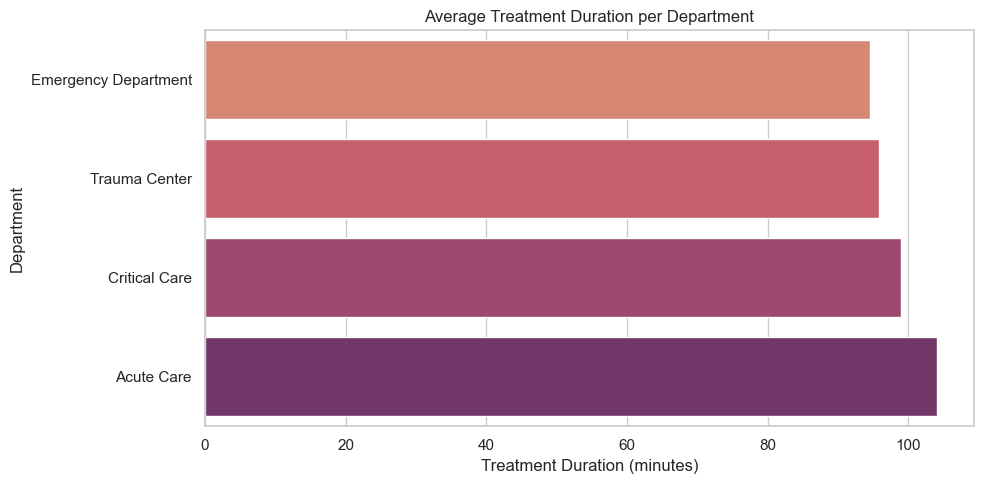

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop nulls or invalid entries just in case
valid_df = merged_df[merged_df['treatment_duration_minutes'].notnull()]

# Group by department and calculate average
avg_time = valid_df.groupby('department_name')['treatment_duration_minutes'].mean().sort_values()

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=avg_time.values, y=avg_time.index, palette='flare')
plt.title('Average Treatment Duration per Department')
plt.xlabel('Treatment Duration (minutes)')
plt.ylabel('Department')
plt.tight_layout()
plt.show()


### Explanation:

Filters out records with missing treatment durations and calculates the average duration per department using groupby() and mean().

Plots a horizontal bar chart to compare how long patients are typically treated across different departments, helping identify performance variations.



### Compute Patient Wait and Treatment Durations from Timestamps

In [59]:
import pandas as pd

# Filter out rows with invalid times
time_columns = ['time_arrived', 'time_treatment_start', 'time_complete']
for col in time_columns:
    merged_df[col] = merged_df[col].replace(['00:00:00', '', None], pd.NA)

# Combine date and time into datetime fields
merged_df['arrived_dt'] = pd.to_datetime(
    merged_df['date_arrived'] + ' ' + merged_df['time_arrived'], errors='coerce'
)
merged_df['start_dt'] = pd.to_datetime(
    merged_df['date_treatment_start'] + ' ' + merged_df['time_treatment_start'], errors='coerce'
)
merged_df['date_complete'] = pd.to_datetime(
    merged_df['date_complete'] + ' ' + merged_df['time_complete'], errors='coerce'
)

# Calculate durations
merged_df['wait_minutes'] = (merged_df['start_dt'] - merged_df['arrived_dt']).dt.total_seconds() / 60
merged_df['treatment_minutes'] = (merged_df['date_complete'] - merged_df['start_dt']).dt.total_seconds() / 60


### Explanation:

Cleans and combines date and time columns into complete datetime fields (arrived_dt, start_dt, complete_dt) while handling invalid or missing time values.

Calculates wait_minutes (time from arrival to treatment start) and treatment_minutes (time from treatment start to completion) for analyzing emergency care timelines.

### Average ER Wait Time by Department

C:\Users\Admin\AppData\Local\Temp\ipykernel_8316\1121218535.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_wait.values, y=avg_wait.index, palette='crest')


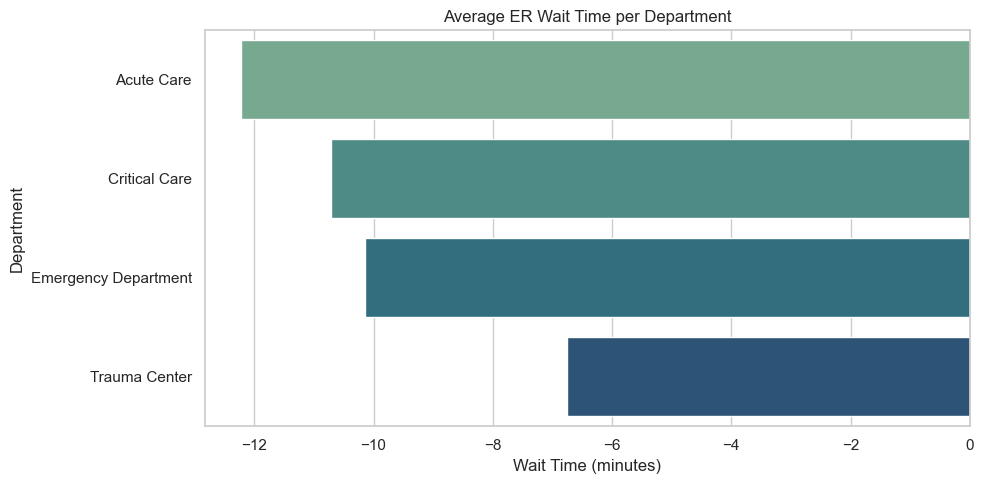

In [63]:
avg_wait = merged_df.groupby('department_name')['wait_minutes'].mean().sort_values()

plt.figure(figsize=(10, 5))
sns.barplot(x=avg_wait.values, y=avg_wait.index, palette='crest')
plt.title('Average ER Wait Time per Department')
plt.xlabel('Wait Time (minutes)')
plt.ylabel('Department')
plt.tight_layout()
plt.show()


### Explanation:

Calculates the average patient wait time before treatment (wait_minutes) for each department using groupby() and mean().

Plots a horizontal bar chart to compare wait times across departments, helping identify where delays may be longer or shorter in the emergency room.



### Extract Hour of Patient Arrival from Date and Time

In [66]:
# Combine date and time columns into a single datetime
merged_df['arrival_datetime'] = pd.to_datetime(
    merged_df['date_arrived'].astype(str) + ' ' + merged_df['time_arrived'].astype(str),
    errors='coerce'
)

# Extract hour
merged_df['arrival_hour'] = merged_df['arrival_datetime'].dt.hour


### Explanation:

Combines the date_arrived and time_arrived columns into a single arrival_datetime column using pd.to_datetime(), handling any parsing errors safely.

Extracts the hour component from arrival_datetime to create a new column arrival_hour, useful for analyzing hourly trends in patient arrivals.



### Emergency Room Visits by Hour of Day

C:\Users\Admin\AppData\Local\Temp\ipykernel_8316\1913850517.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_df, x='arrival_hour', palette='plasma')


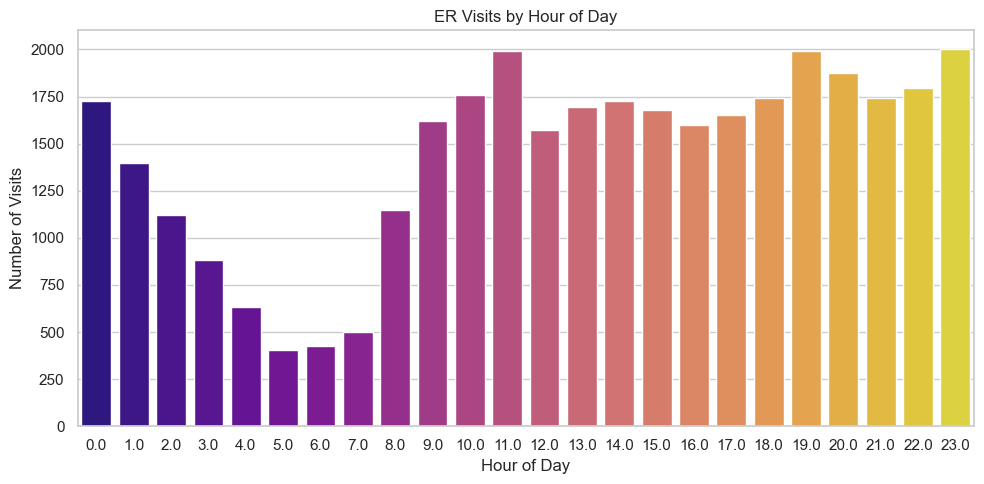

In [70]:
plt.figure(figsize=(10, 5))
sns.countplot(data=merged_df, x='arrival_hour', palette='plasma')
plt.title('ER Visits by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Visits')
plt.tight_layout()
plt.show()


### Explanation:

Creates a count plot showing how many patients arrived at the emergency room during each hour of the day using the arrival_hour column.

Helps identify peak hours of ER activity, which is useful for staffing, resource allocation, and operational planning.

### Heatmap of Average Wait Time by Outcome and Triage Priority

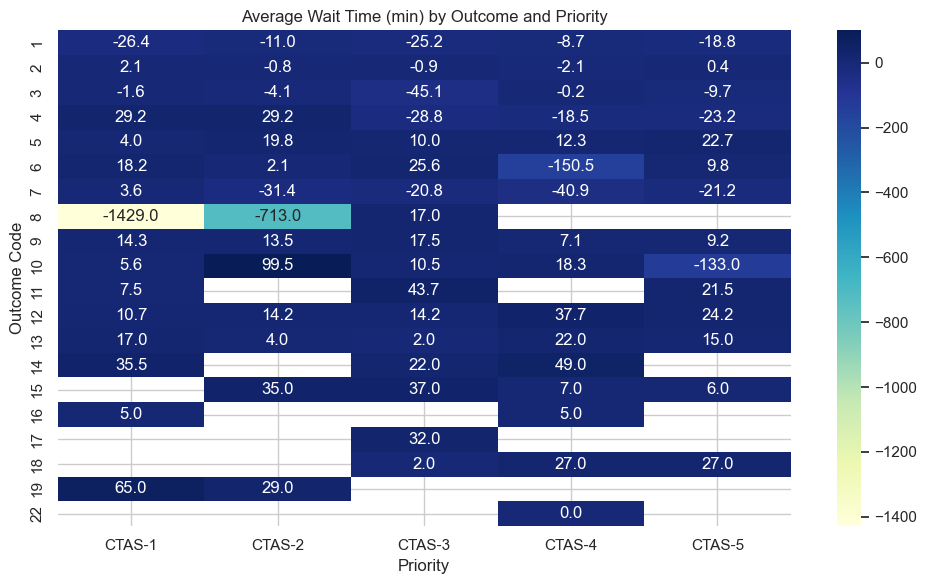

In [73]:
plt.figure(figsize=(10, 6))
heat_data = merged_df_clean.pivot_table(index='outcome_code', columns='priority', values='wait_time', aggfunc='mean')
sns.heatmap(heat_data, annot=True, fmt=".1f", cmap='YlGnBu')
plt.title("Average Wait Time (min) by Outcome and Priority")
plt.xlabel("Priority")
plt.ylabel("Outcome Code")
plt.tight_layout()
plt.show()


### Explanation:

Creates a pivot table that calculates the average patient wait time (in minutes) grouped by both outcome_code and priority.

Visualizes the result as a heatmap, making it easy to spot patterns—such as which outcome-priority combinations experience longer or shorter wait times.



### Line Plot of Daily Average Wait Time Trend

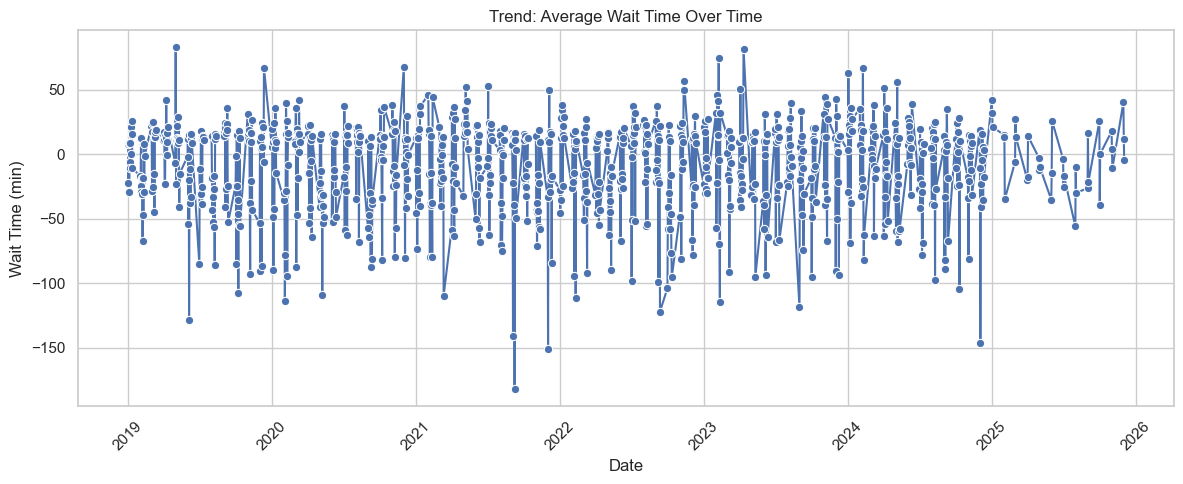

In [85]:
merged_df_clean['arrived_day'] = merged_df_clean['time_arrived'].dt.date
trend_data = merged_df_clean.groupby('arrived_day')['wait_time'].mean().reset_index()

plt.figure(figsize=(12, 5))
sns.lineplot(data=trend_data, x='arrived_day', y='wait_time', marker='o')
plt.title("Trend: Average Wait Time Over Time")
plt.xlabel("Date")
plt.ylabel("Wait Time (min)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Explanation:

Extracts the arrival date (arrived_day) from the datetime column and groups the data by day to calculate the average wait_time per date.

Plots a line chart to visualize how average ER wait times change over time, helping detect patterns, spikes, or improvements in service efficiency.



### Display Mean and Median ER Wait Times

In [89]:
print("Mean wait time:", merged_df_clean['wait_time'].mean())
print("Median wait time:", merged_df_clean['wait_time'].median())


Mean wait time: -9.943257962487623
Median wait time: 4.0


### Explanation:

Calculates and prints the mean and median of the wait_time column from the cleaned dataset.

Helps summarize central tendencies, where the mean reflects the overall average and the median indicates the middle value, useful for understanding skewness in wait times.



### Top 15 Doctors by Number of ER Visits Handled

C:\Users\Admin\AppData\Local\Temp\ipykernel_8316\1825746450.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_doctors.values, y=top_doctors.index, palette='crest')


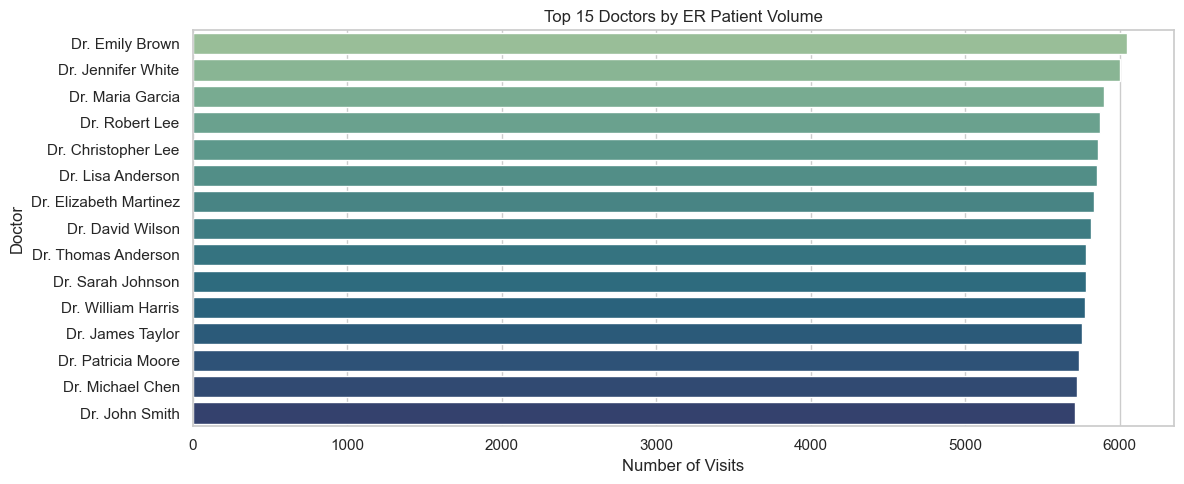

In [93]:
# Number of visits handled per doctor
plt.figure(figsize=(12, 5))
top_doctors = merged_df['doctor_name'].value_counts().head(15)
sns.barplot(x=top_doctors.values, y=top_doctors.index, palette='crest')
plt.title('Top 15 Doctors by ER Patient Volume')
plt.xlabel('Number of Visits')
plt.ylabel('Doctor')
plt.tight_layout()
plt.show()


### Explanation:

Counts how many patient visits each doctor handled using value_counts() and selects the top 15 based on volume.

Visualizes these counts in a horizontal bar chart to highlight the most active doctors in the emergency room, useful for workload and performance analysis.



###  Count Plot of ER Visits by Day of the Week

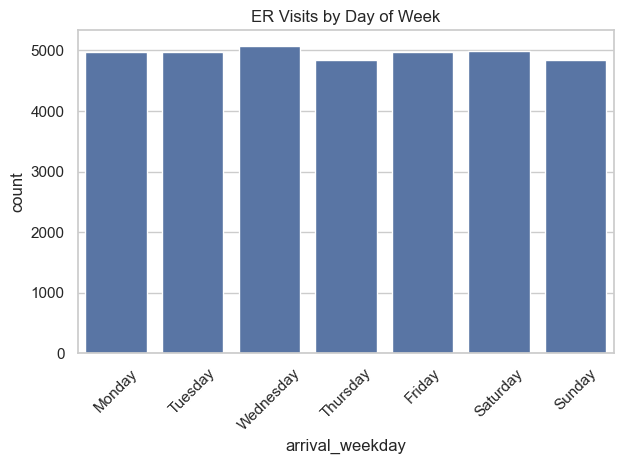

In [97]:
merged_df['arrival_weekday'] = merged_df['arrival_datetime'].dt.day_name()
sns.countplot(data=merged_df, x='arrival_weekday', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('ER Visits by Day of Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Explanation:

Extracts the weekday name from each patient’s arrival timestamp using .dt.day_name() and adds it as a new column arrival_weekday.

Plots the number of ER visits for each day in order from Monday to Sunday, helping identify daily patterns or peak workload days.



### Count Plot of ER Visits by Weekend and Night Shifts

Text(0.5, 1.0, 'Weekend and Night ER Visits (Potential Burnout Drivers)')

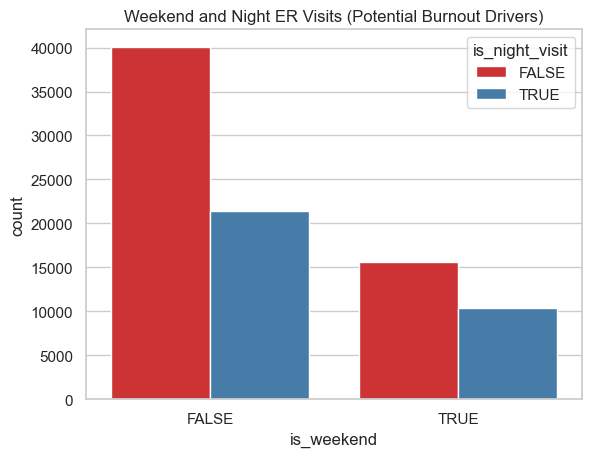

In [101]:
sns.countplot(data=merged_df, x='is_weekend', hue='is_night_visit', palette='Set1')
plt.title('Weekend and Night ER Visits (Potential Burnout Drivers)')


### Explanation:

Visualizes how emergency room visits are distributed based on whether they occurred on a weekend (is_weekend) and during night hours (is_night_visit) using a grouped bar chart.

Helps identify potential operational stress periods (like weekend nights), which are often linked to staff burnout and resource strain.

### Histogram of Total ER Visit Durations

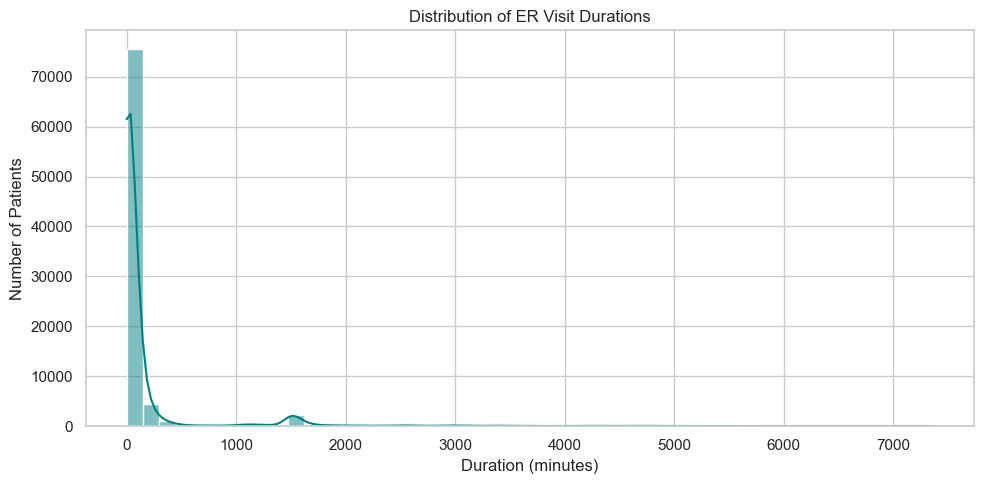

In [105]:
plt.figure(figsize=(10, 5))
sns.histplot(merged_df['total_er_duration_minutes'].dropna(), bins=50, kde=True, color='teal')
plt.title('Distribution of ER Visit Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Patients')
plt.tight_layout()
plt.show()


### Explanation:

Plots the distribution of total ER stay durations (total_er_duration_minutes) using a histogram with a KDE (Kernel Density Estimate) overlay for smoothness.

Helps identify the typical range, skewness, and outliers in ER visit lengths, supporting performance and efficiency evaluations.

### Stacked Bar Chart of Service Target Compliance by Department

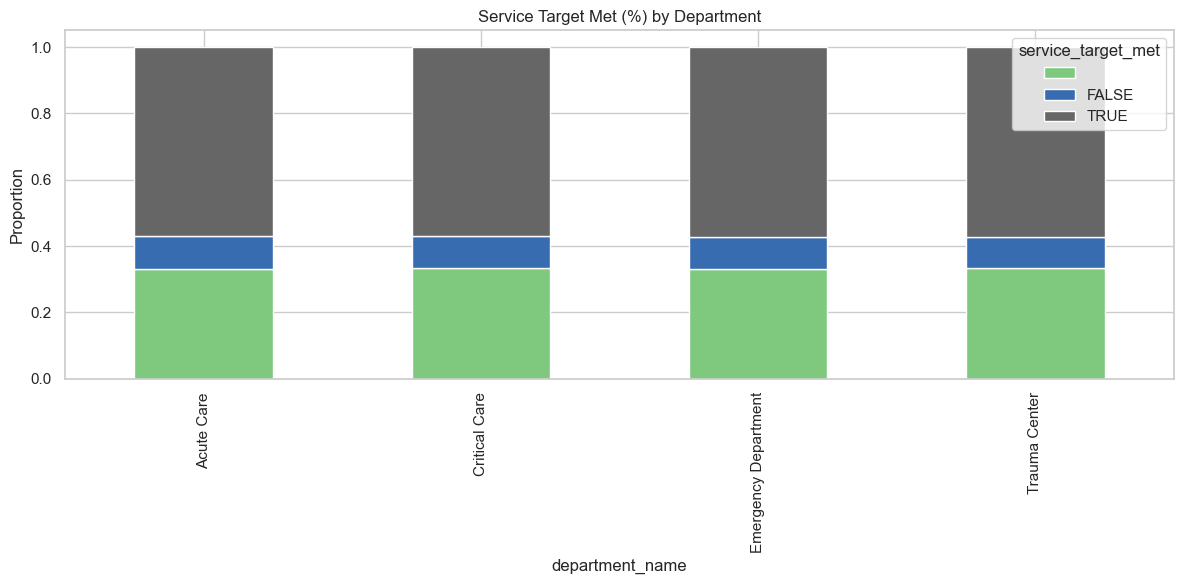

In [109]:
compliance_by_dept = merged_df.groupby('department_name')['service_target_met'].value_counts(normalize=True).unstack()
compliance_by_dept.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Accent')
plt.title('Service Target Met (%) by Department')
plt.ylabel('Proportion')
plt.tight_layout()
plt.show()


### Explanation:

Calculates the proportion of cases where the service target was met (service_target_met) within each department using normalized value counts.

Displays these proportions in a stacked bar chart to visually compare departmental performance in meeting service time targets, aiding operational efficiency reviews.



### Box Plot of Patient Satisfaction Scores by Department

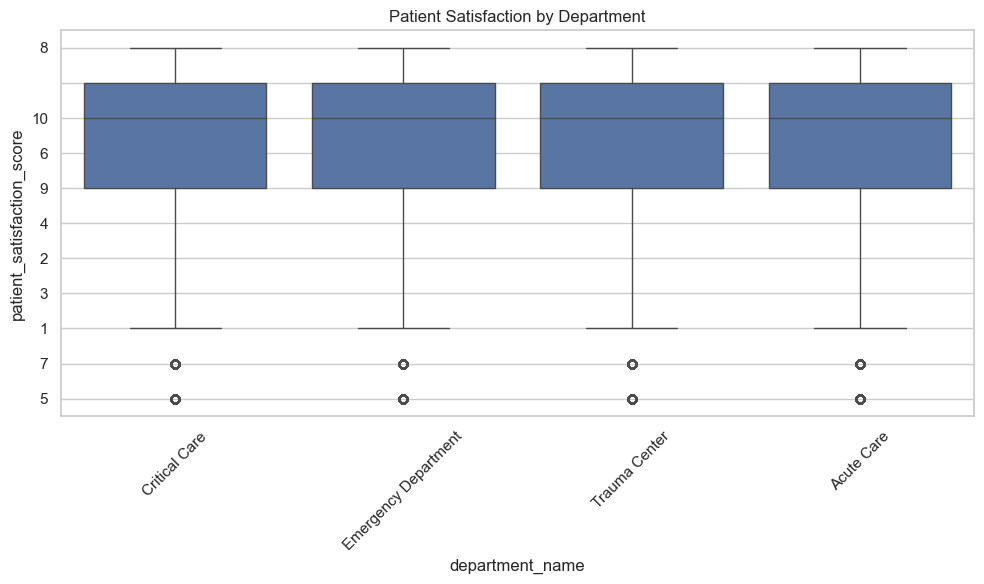

In [113]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x='department_name', y='patient_satisfaction_score')
plt.title('Patient Satisfaction by Department')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Explanation:

Visualizes the distribution of patient_satisfaction_score for each department using a box plot, showing medians, variability, and outliers.

Helps identify departments with consistently high or low patient satisfaction, supporting targeted quality improvement efforts.

### Line Plot of Daily ER Visit Volume Over Time

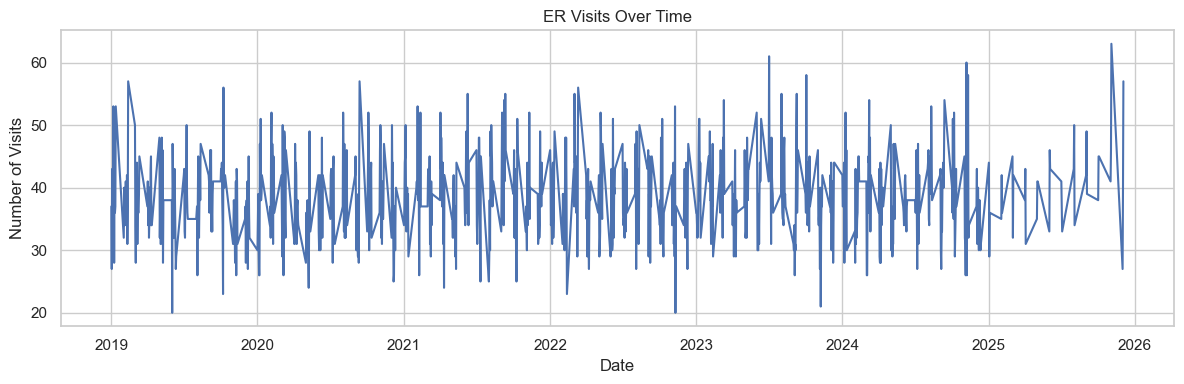

In [117]:
merged_df['date_only'] = pd.to_datetime(merged_df['arrival_datetime']).dt.date
visits_per_day = merged_df.groupby('date_only').size()

plt.figure(figsize=(12, 4))
visits_per_day.plot()
plt.title('ER Visits Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Visits')
plt.grid(True)
plt.tight_layout()
plt.show()


### Explanation:

Extracts the date part (date_only) from the arrival_datetime and groups the data to count the number of visits per day.

Plots a line graph to visualize ER visit trends over time, helping identify fluctuations, seasonal patterns, or surge events.

### Prepare Features for Predictive Modeling of Wait Time

In [121]:
print(merged_df.columns.tolist())


['id', 'patient_id', 'mr_no', 'gender_x', 'episode_no', 'date_arrived', 'time_arrived', 'date_tiraged', 'time_tiraged', 'date_treatment_start', 'time_treatment_start', 'date_complete', 'time_complete', 'time_treatment', 'nationality_x', 'national_id_x', 'location_code_x', 'date_of_birth_x', 'age_text_x', 'mobile_no_x', 'patient_category_x', 'priority', 'outcome_code', 'arrival_method', 'admit_date', 'admit_time', 'bed_no', 'ward', 'accepting_admission_request_time', 'pharmacy_order_date', 'pharmacy_order_time', 'pharmacy_delivery_date', 'pharmacy_delivery_time', 'clinic_name', 'diagnosis_code', 'waiting_time_minutes', 'total_er_duration_minutes', 'triage_response_time_minutes', 'treatment_duration_minutes', 'admission_processing_time_minutes', 'bed_assignment_time_minutes', 'pharmacy_response_time_minutes', 'is_admitted', 'is_weekend', 'is_night_visit', 'triage_compliance_flag', 'service_target_met', 'arrival_shift', 'age_group', 'length_of_stay_category', 'wait_time_category', 'visit_

In [123]:
# Select numerical and categorical features
selected_features = [
    'priority', 'age_group', 'department_name', 'is_admitted',
    'time_arrived', 'patient_satisfaction_score', 'treatment_duration_minutes'
]
model_df = merged_df_clean[selected_features + ['Patient Waittime']].dropna()

# Encode categorical columns
from sklearn.preprocessing import LabelEncoder
for col in ['age_group', 'department_name']:
    le = LabelEncoder()
    model_df[col] = le.fit_transform(model_df[col].astype(str))


### Explanation:

Selects relevant numerical and categorical features along with the target variable wait_time, and removes rows with missing values to create a clean modeling dataset.

Applies label encoding to convert categorical columns (age_group, department_name_y) into numerical format required for machine learning models.



### Inspect the Prepared Dataset for Modeling

In [127]:
print("Shape of model_df:", model_df.shape)
print("Null counts:\n", model_df.isnull().sum())
print(model_df.head())


Shape of model_df: (16366, 8)
Null counts:
 priority                      0
age_group                     0
department_name               0
is_admitted                   0
time_arrived                  0
patient_satisfaction_score    0
treatment_duration_minutes    0
Patient Waittime              0
dtype: int64
   priority  age_group  department_name is_admitted        time_arrived  \
1    CTAS-4          0                2       FALSE 2022-05-11 08:46:00   
9    CTAS-1          0                2       FALSE 2024-08-08 12:26:00   
10   CTAS-1          0                2       FALSE 2024-08-08 12:26:00   
15   CTAS-4          0                2       FALSE 2020-07-02 12:20:00   
18   CTAS-1          0                3        TRUE 2023-07-09 14:19:00   

   patient_satisfaction_score  treatment_duration_minutes  Patient Waittime  
1                                                       0              45.0  
9                                                       0              51.0  
10

### Explanation:

Prints the shape and null value count of model_df to confirm data readiness and ensure no missing values remain.

Displays the first few rows of the dataset to preview the encoded and cleaned features before applying machine learning models.



### Prepare Full Dataset for Machine Learning

In [131]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Make a copy
ml_df = merged_df.copy()

# Drop irrelevant or identifier columns
drop_cols = ['id', 'mr_no', 'national_id_x', 'national_id_y', 'mobile_no_x', 'mobile_no_y', 'created_at', 'updated_at']
ml_df.drop(columns=[col for col in drop_cols if col in ml_df.columns], inplace=True)

# Fill missing numeric values with median
numeric_cols = ml_df.select_dtypes(include='number').columns
ml_df[numeric_cols] = ml_df[numeric_cols].fillna(ml_df[numeric_cols].median())

# Fill missing categorical values with mode
categorical_cols = ml_df.select_dtypes(include='object').columns
ml_df[categorical_cols] = ml_df[categorical_cols].fillna(ml_df[categorical_cols].mode().iloc[0])

# Label Encoding for categorical variables
le = LabelEncoder()
for col in categorical_cols:
    ml_df[col] = le.fit_transform(ml_df[col])

ml_df.head()


,patient_id,gender_x,episode_no,date_arrived,time_arrived,date_tiraged,time_tiraged,date_treatment_start,time_treatment_start,date_complete,...,hospital_name,outcome,arrived_dt,start_dt,wait_minutes,treatment_minutes,arrival_datetime,arrival_hour,arrival_weekday,date_only
0,59968,1,33,556,498,556,31763,556,506,2023-10-05 08:08:00,...,1,5,2023-08-05 07:51:00,2023-08-05 08:06:00,15.0,87842.0,2023-08-05 07:51:00,7.0,2,664
1,59981,0,21,366,556,366,18003,366,547,2022-07-11 08:46:00,...,0,4,2022-05-11 08:46:00,2022-05-11 08:46:00,0.0,87840.0,2022-05-11 08:46:00,8.0,6,490
2,60053,1,29,1073,704,1073,23773,1073,682,NaT,...,0,4,NaT,NaT,4.0,43294.0,NaT,14.0,6,896
3,60061,1,6,997,723,997,5458,997,701,NaT,...,1,4,NaT,NaT,4.0,43294.0,NaT,14.0,6,896
4,60061,1,6,997,723,997,5458,997,701,NaT,...,1,4,NaT,NaT,4.0,43294.0,NaT,14.0,6,896


### Explanation:

Cleans and preprocesses the full dataset by dropping irrelevant ID and personal identifier columns, filling missing values (median for numeric, mode for categorical), and encoding all categorical features using LabelEncoder.

Produces a fully numeric, model-ready DataFrame (ml_df) suitable for training various machine learning algorithms.



### Train and Evaluate a Random Forest Classifier to Predict Patient Outcomes

In [158]:
# Remove all datetime columns before ML
datetime_cols = ml_df.select_dtypes(include=['datetime64[ns]', 'datetime64[ns, UTC]']).columns
ml_df = ml_df.drop(columns=datetime_cols)

# Redefine features and target
target = 'outcome_code'  # Change if you have a different target
features = [col for col in ml_df.columns if col != target]

X = ml_df[features]
y = ml_df[target]

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
from sklearn.metrics import classification_report, accuracy_score

accuracy = accuracy_score(y_test, y_pred) * 100  # Convert to percentage
print(f"✅ Accuracy: {accuracy:.2f}%")
print(classification_report(y_test, y_pred))


✅ Accuracy: 99.82%
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      9010
           2       1.00      1.00      1.00      7236
           3       0.98      0.99      0.99       194
           4       1.00      1.00      1.00       586
           5       1.00      0.69      0.81        16
           6       0.96      0.94      0.95        49
           7       0.96      0.99      0.97       330
           8       0.00      0.00      0.00         1
           9       1.00      0.75      0.86        24
          10       1.00      0.20      0.33         5
          11       1.00      1.00      1.00         5
          12       0.94      0.94      0.94        16
          13       1.00      0.25      0.40         4
          14       1.00      0.50      0.67         2
          15       1.00      0.67      0.80         3
          16       0.00      0.00      0.00         2
          17       1.00      1.00      1.00         3
        

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Explanation:

Prepares the dataset by dropping datetime columns, defining features and target (outcome_code), splitting the data, and training a RandomForestClassifier.

Predicts outcomes on the test set and evaluates model performance using accuracy and a detailed classification report (precision, recall, F1-score).



### Encode Target Variable and Split Data for Modeling

In [137]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)  # y = df['outcome_code'] or your target

# Now split:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


### Explanation:

Encodes the categorical target variable (outcome_code) into numerical labels using LabelEncoder, which is required for most classification models.

Splits the features (X) and encoded target (y_encoded) into training and testing sets using an 80-20 ratio for model training and evaluation.

### Inspect Training Data Shape and Target Class Distribution

In [140]:
import numpy as np

print("X_train shape:", X_train.shape)
print("y_train unique classes:", np.unique(y_train))
print("y_test unique classes:", np.unique(y_test))


X_train shape: (69961, 82)
y_train unique classes: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
y_test unique classes: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]


### Explanation:

Prints the shape of the feature set X_train to confirm the number of samples and features used for training.

Displays the unique class labels present in y_train and y_test, helping verify that all outcome classes are represented in both sets for balanced learning and evaluation.



### Stratified Train-Test Split for Balanced Classification

In [143]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)


### Explanation:

Splits the dataset into training and testing sets using an 80–20 ratio, while preserving the class distribution of the target variable (y_encoded) via stratify=y_encoded.

Ensures that both training and testing sets have representative samples of each outcome class, which is crucial for fair evaluation in classification problems.

In [145]:
X_train_clean = X_train.dropna()


### Train a Gradient Boosting Regressor and Evaluate Performance

In [153]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Fill missing values with the column mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train the model
reg = GradientBoostingRegressor()
reg.fit(X_train_imputed, y_train)

# Predict and evaluate
y_pred = reg.predict(X_test_imputed)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 0.0025317430760198336
R2 Score: 0.9996323876266148


### Explanation:

Uses SimpleImputer to fill missing values in the feature set with column means, then fits a GradientBoostingRegressor on the training data to predict a continuous target.

Evaluates the model using Mean Absolute Error (MAE) and R² Score, providing insights into the model’s accuracy and ability to explain variance in the target.



## Random Forest Classification with Confusion Matrix Visualization for Outcome Prediction

C:\Users\Admin\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


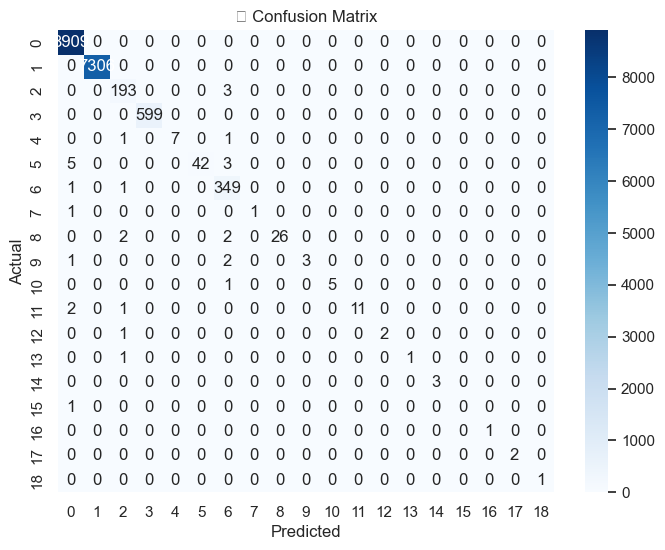

In [160]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ---------------------------------------
# Start from merged_df (already created earlier)
# ---------------------------------------
ml_df = merged_df.copy()

# Drop irrelevant/ID columns (adjust as needed)
drop_cols = ['id', 'mr_no', 'mobile_no_x', 'mobile_no_y', 'national_id_x', 'national_id_y',
             'created_at', 'updated_at']
ml_df.drop(columns=[col for col in drop_cols if col in ml_df.columns], inplace=True)

# Drop datetime columns
datetime_cols = ml_df.select_dtypes(include=['datetime64[ns]', 'datetime64[ns, UTC]']).columns
ml_df.drop(columns=datetime_cols, inplace=True)

# Fill missing values
numeric_cols = ml_df.select_dtypes(include='number').columns
ml_df[numeric_cols] = ml_df[numeric_cols].fillna(ml_df[numeric_cols].median())

categorical_cols = ml_df.select_dtypes(include='object').columns
ml_df[categorical_cols] = ml_df[categorical_cols].fillna(ml_df[categorical_cols].mode().iloc[0])

# Label Encoding for categorical columns
le = LabelEncoder()
for col in categorical_cols:
    ml_df[col] = le.fit_transform(ml_df[col])

# ---------------------------------------
# Define features and target
# ---------------------------------------
target = 'outcome_code'  # Change if needed
features = [col for col in ml_df.columns if col != target]

X = ml_df[features]
y = ml_df[target]

# ---------------------------------------
# Split the dataset
# ---------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Train the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

# ---------------------------------------
# Confusion Matrix Only
# ---------------------------------------
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("🔍 Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### Explanation:
Cleans and prepares the dataset by removing ID/date/time columns, filling missing values (median for numeric, mode for categorical), and encoding categorical features using LabelEncoder.

Splits the data, trains a RandomForestClassifier, and predicts the target (outcome_code) on the test set.

Generates and visualizes a confusion matrix using Seaborn to evaluate model performance across predicted vs actual classes.

## Summary of the Project
This project focuses on predicting patient outcomes in the Emergency Room (ER) using machine learning. The data was first cleaned by removing unnecessary ID and time-related columns, handling missing values, and converting categorical data into numerical format. A Random Forest Classifier was used to train the model on historical patient records. The model's performance was evaluated using a confusion matrix, which helped visualize how well it predicted different outcome categories. This approach can support hospitals in making faster and more accurate decisions during emergency care.
